Paulo Victor Sales Araujo

# Exercícios 1

Você recebeu o arquivo **all_seasons.csv**. Ele contém informações sobre jogadores de basket. Carregue o  arquivo em um dataframe df. Em relação a altura dos jogadores (player_height) trabalhe os seguintes tópicos:


1. Remova os outliers utilizando o método de intervalo interquartil. Como resultado, você terá um novo dataframe chamado df_filtrado. Calcule a média e o desvio padrão em df_filtrado. Faça um histograma em relação as alturas do jogadores em df_filtrado destacando a curva de densidade de probabilidade da função normal.   

2. Em df_filtrado, qual é a probabilidade de uma pessoa ter mais de 2 metros?

3. Em df_filtrado, qual é a probabilidade de uma pessoa ter mais de 2.1 metros?

4. Em df_filtrado, qual é a probabilidade de uma pessoa ter altura entre 1.90 e 2.1 metros?

5. Qual é o número mínimo de jogadores que devo considerar em uma amostra aleatória para capturar a média de altura dos jogadores com 95% de confiança e margem de erro de 5 cm?  

6. Faça um filtro de obtenha uma amostra de 1000 jogadores. Construa o intervalo de confiança de 90% para a média da altura para toda a população.




In [19]:
!pip install --upgrade gdown
!gdown 15Yb577a1G6ABOxNNcMFmSXY-XSbnZLM7

Downloading...
From: https://drive.google.com/uc?id=15Yb577a1G6ABOxNNcMFmSXY-XSbnZLM7
To: /content/all_seasons.csv
100% 1.66M/1.66M [00:00<00:00, 143MB/s]


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1° Questão

In [21]:
df=pd.read_csv('all_seasons.csv')

In [22]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [23]:
q1=df['player_height'].quantile(q=0.25)
q3=df['player_height'].quantile(q=0.75)
iqr=q3-q1
limsup=q3+1.5*iqr
liminf=q1-1.5*iqr

In [24]:
df_filtrado=df[(df['player_height']<limsup)&(df['player_height']>liminf)].copy().reset_index(drop=True)

In [25]:
df_filtrado

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11078,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,NaN,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11079,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11080,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11081,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,NaN,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [26]:
df_filtrado['player_height'].std()

8.934068722885911

In [27]:
sigma=df_filtrado['player_height'].std()
media_amostra=df_filtrado.sample(1000)['player_height'].mean()
E=(1.645*sigma)/np.sqrt(1000)
liminf=media_amostra-E
limsup=media_amostra+E
print(liminf,limsup)

200.6346745023398 201.5641654976602


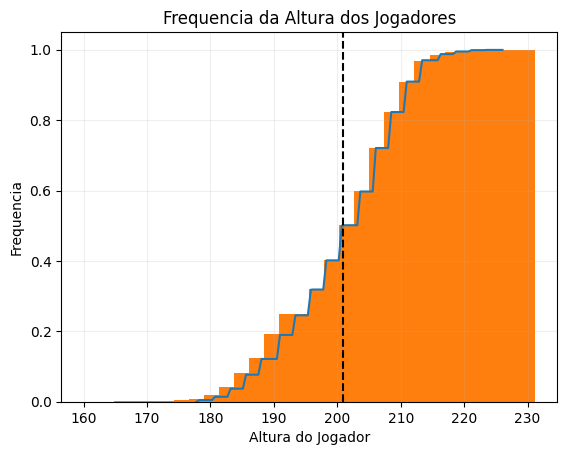

In [28]:
media = df_filtrado['player_height'].mean()
filtro=np.linspace(df_filtrado['player_height'].min(),df_filtrado['player_height'].max(),100)
df_sorted=pd.DataFrame({'player_height':df_filtrado.player_height.sort_values().values})
percentual = []
for f in filtro:
    percentual.append(len(df_filtrado[df_filtrado['player_height']<f])/len(df_sorted))

plt.plot(filtro, percentual)
plt.grid(alpha=0.2)
plt.hist(df['player_height'],density=True,cumulative=True,bins=30)
plt.axvline(media,ls='--',color='black')
plt.xlabel('Altura do Jogador')
plt.ylabel('Frequencia')
plt.title('Frequencia da Altura dos Jogadores')
plt.show()

# 2° Questão

In [29]:
len(df_filtrado[df_filtrado['player_height']> 200])/len(df_filtrado)

0.5983939366597492

# 3° Questão

In [30]:
len(df_filtrado[df_filtrado['player_height']> 210])/len(df_filtrado)

0.17702788053776053

# 4° Questão

In [31]:
len(df_filtrado[(df_filtrado['player_height']> 190)&(df_filtrado['player_height']<210)])/len(df_filtrado)

0.7014346296129207

# 5° Questão

In [36]:
Z = 1.96 #Z é o valor crítico correspondente ao nível de confiança desejado (para um nível de confiança de 95% Z é aproximadamente 1.96).
margem_erro = 5
tamanho_amostra = ((Z * df_filtrado['player_height'].std()) / margem_erro) ** 2
tamanho_amostra = int(np.ceil(tamanho_amostra))
print(tamanho_amostra)

13


# 6° Questão

In [38]:
amostra_1000 = df_filtrado.sample(1000).reset_index(drop=True)
media = amostra_1000['player_height'].mean()
std = amostra_1000['player_height'].std()

Z_90 = 1.645
erro_medio = std / np.sqrt(len(amostra_1000))

confianca = (media - Z * erro_medio, media_amostra + Z * erro_medio)

print(confianca)

(200.85980388324506, 201.78903611675494)
